In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('ecommerce_data.csv', encoding = 'ISO-8859-1')
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


Data Cleaning


In [7]:
df = df.dropna(subset='CustomerID')

In [8]:
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

In [9]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [10]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [11]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08


**KPI Analysis**

In [14]:
#1. Total Revenue


total_revenue = df['TotalPrice'].sum()
print(f'Total Revenue: ${total_revenue:.2f}')

Total Revenue: $8911407.90


In [15]:
#2. Top 10 Products by Revenue

#top_products = df.groupby('Description')['TotalPrice'].sum().nlargest(10)

top_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
print(f'Top 10 Products by Revenue: ${top_products}')

Top 10 Products by Revenue: $Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
Name: TotalPrice, dtype: float64


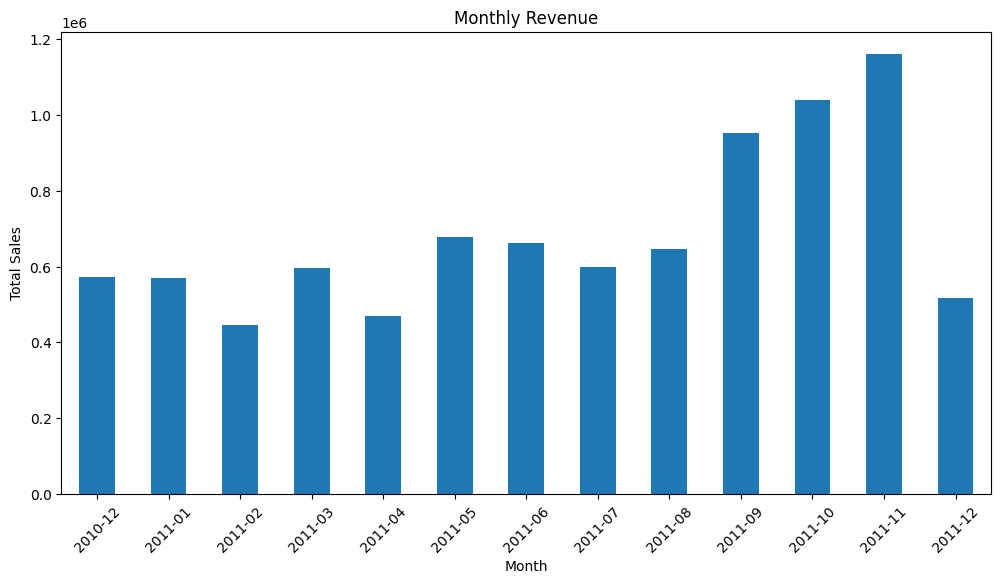

In [24]:
#3. Monthly Sales Trend

import matplotlib.pyplot as plt

df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['TotalPrice'].sum()


monthly_sales.plot(kind='bar', figsize=(12, 6))
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

<Axes: title={'center': 'Top 10 Countries by Revenue'}, ylabel='Country'>

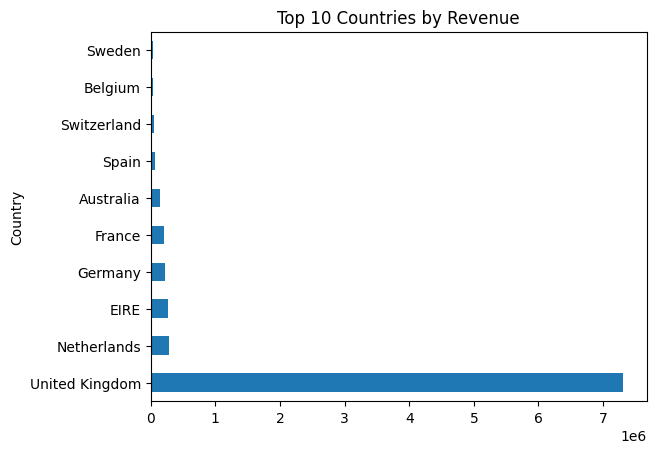

In [25]:
#Top Countries by Revenue

top_countries = df.groupby('Country')['TotalPrice'].sum().nlargest(10)
top_countries.plot(kind='barh', title = 'Top 10 Countries by Revenue')

In [26]:
# Avg Order Value per Customer

avg_order_value = df.groupby('CustomerID')['TotalPrice'].sum()
avg_order_value = avg_order_value.mean()

print(f'Average Order Value: ${avg_order_value}')



Average Order Value: $2053.793017746025


In [30]:
df['TotalPrice'].nlargest(10)

,TotalPrice
540421,168469.60
61619,77183.60
222680,38970.00
173382,8142.75
348325,7144.72
52711,6539.40
160546,6539.40
421601,4992.00
52709,4921.50
160542,4632.00


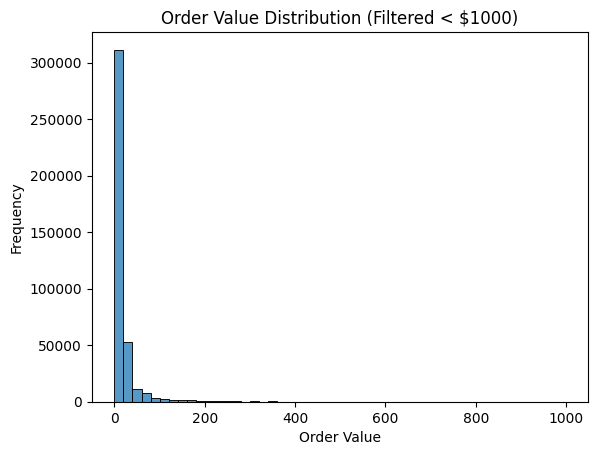

In [37]:
# Visualize

import seaborn as sns
filtered_df = df[df['TotalPrice'] < 1000]

# Now plot the histogram
sns.histplot(filtered_df['TotalPrice'], bins=50)
plt.title("Order Value Distribution (Filtered < $1000)")
plt.xlabel("Order Value")
plt.ylabel("Frequency")
plt.show()